In [ ]:
!pip install matplotlib
!pip install scikit-learn

In [ ]:
import pandas as pd
import ast
import numpy as np
from tensorflow import keras
import tensorflow as tf

# Montar Google Drive si aún no está montado
from google.colab import drive
drive.mount('/content/drive')

# Cargar el dataset desde Google Drive
dataset_path = '/content/drive/My Drive/compatibility_dataset/compatibility_dataset_len76.csv'

# Leer el archivo CSV y procesar las listas
df = pd.read_csv(dataset_path)


# Aplanar y convertir las listas en matrices NumPy
def flatten_and_convert(row):
    try:
        offers_A = ast.literal_eval(row['offers_A'])
        demands_A = ast.literal_eval(row['demands_A'])
        offers_B = ast.literal_eval(row['offers_B'])
        demands_B = ast.literal_eval(row['demands_B'])

        flat_data = np.concatenate([offers_A, demands_A, offers_B, demands_B])
        return flat_data.astype(np.int32)
    except:
        return None

# Aplicar la función a cada fila del DataFrame
X = df.apply(flatten_and_convert, axis=1).dropna().values
y = df['compatibility_percent'].dropna().values

# Crear un modelo secuencial
model = keras.Sequential()

# Capas de entrada
model.add(keras.layers.Input(shape=(152,)))

# Capas de procesamiento con regularización
model.add(keras.layers.Dense(128, activation='gelu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))


# Capa de similitud
model.add(keras.layers.Dense(1, activation='linear'))

# Capa de salida para limitar la salida en el rango de 0 a 100
model.add(keras.layers.Lambda(lambda x: tf.clip_by_value(x, 0, 100)))

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Resumen del modelo
model.summary()

# Entrenar el modelo
# Convierte las matrices NumPy en tensores de TensorFlow
X_tf = tf.constant(X.tolist())
y_tf = tf.constant(y)

# Luego, utiliza los tensores en la función model.fit
history=model.fit(X_tf, y_tf, epochs=50, validation_split=0.2)


Mounted at /content/drive
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               19584     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                              

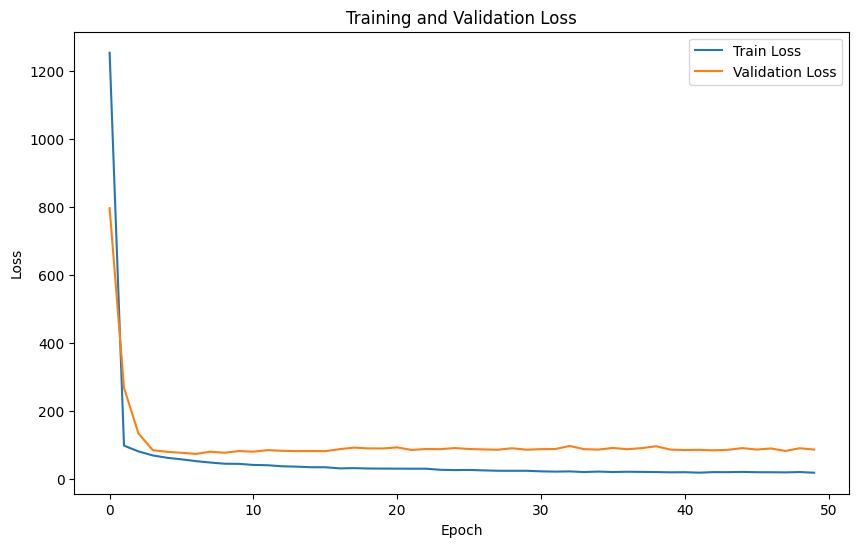

In [ ]:
import matplotlib.pyplot as plt

# Obtener las funciones de pérdida y precisión del historial de entrenamiento
loss = history.history['loss']
val_loss = history.history['val_loss']
#accuracy = history.history['accuracy']  # Solo si estás trabajando en un problema de clasificación

# Generar el gráfico de la función de pérdida
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Generar el gráfico de precisión (solo para problemas de clasificación)
#plt.figure(figsize=(10, 6))
#plt.plot(accuracy, label='Accuracy')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.legend()
#plt.title('Training Accuracy')
#plt.show()


In [ ]:
# Especifica el nombre del archivo .h5 donde deseas guardar el modelo
nombre_archivo = "score_model.h5"

# Guarda el modelo en el archivo .h5
model.save(nombre_archivo)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
